In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
master_df = pd.read_csv(r'master_df.csv',encoding='latin-1')
master_df.drop(['Population', 'Property_Crimes', 'Violent_Crimes', 'Unnamed: 0'], axis=1, inplace=True)
master_df.head()

,Date,RegionName,Afford_idx,SalePrice,UnemployRate,Rate,Days_On_Zillow,Monthly_List_Zillow
0,2013-01-01,Alameda County,0.32,429100.0,8.3,3.41,79.0,2326.0
1,2013-02-01,Alameda County,0.32,428400.0,7.8,3.53,70.0,2229.0
2,2013-03-01,Alameda County,0.32,436100.0,7.5,3.57,51.0,2115.0
3,2013-04-01,Alameda County,0.25,441500.0,7.0,3.45,46.5,2105.0
4,2013-05-01,Alameda County,0.25,460100.0,7.0,3.54,45.0,2159.0


## 1. Set up dataframe

### 1.1. Alameda

Pearson Correlation coefficient with Sale Price for all variables:
Unemployment Rate is -0.96 at strongest negative correlation. Mortgage rate has weakest correlation at -0.11. 
Only number of monthly listing in Zillow is over -0.5.  

In [3]:
alameda_df = master_df[master_df.RegionName=='Alameda County'].copy()

alameda_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 0 to 60
Data columns (total 8 columns):
Date                   61 non-null object
RegionName             61 non-null object
Afford_idx             61 non-null float64
SalePrice              61 non-null float64
UnemployRate           61 non-null float64
Rate                   61 non-null float64
Days_On_Zillow         61 non-null float64
Monthly_List_Zillow    61 non-null float64
dtypes: float64(6), object(2)
memory usage: 4.3+ KB


### 1.2. Sacramento

Pearson Correlation coefficient with Sale Price for all variables:
Unemployment Rate is -0.95 at strongest negative correlation followed by Affordability indext at -0.89. 
Mortgage rate has weakest correlation at -0.09. 
Surprisingly, for this market, number of days on Zillow has correlation of -0.55 and number of monthly listing in Zillow is at 0.16. 
Just looking at Pearson coffecient, Sacramento market has different characteristics than Alameda. 

In [4]:
sac_df = master_df[master_df.RegionName=='Sacramento County'].copy()

### 1.3. L.A.

Pearson Correlation coefficient with Sale Price for all variables:
Unemployment Rate is -0.93 at strongest negative correlation followed by Affordability indext and Monthly listing at -0.67. 
Mortgage rate has weakest correlation at -0.11. 
L.A. is yet again different from Sacramento and Alameda in that affordability index and number of monthly listing is over -0.5.

In [5]:
la_df = master_df[master_df.RegionName=='Los Angeles County'].copy()

## 2. Linear Regression for Sale Price

### 2.1. Try against all data (alameda, sacramento and LA combined).
R-squared is 0.300 so the model is 30% good at explaining the price which is not very good. 
Prob (F-statistic) is very close to 0 so we can reject the null hypothesis. Null hypothesis is that a intercept-only model is better. (YMJ Question: What does this mean?)  

In [6]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [7]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
master_m = ols('SalePrice ~ UnemployRate',master_df).fit()
print(master_m.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     77.74
Date:                Wed, 11 Sep 2019   Prob (F-statistic):           9.66e-16
Time:                        19:13:21   Log-Likelihood:                -2407.7
No. Observations:                 183   AIC:                             4819.
Df Residuals:                     181   BIC:                             4826.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     7.246e+05   3.31e+04     21.874   

### 2.2. Let's try just Alameda

R squared is 0.92 which means the model is 92% good at explaining the price. This is much better. 

In [8]:
alameda_m = ols('SalePrice ~ UnemployRate',alameda_df).fit()
print(alameda_m.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     680.0
Date:                Wed, 11 Sep 2019   Prob (F-statistic):           4.43e-34
Time:                        19:13:21   Log-Likelihood:                -704.30
No. Observations:                  61   AIC:                             1413.
Df Residuals:                      59   BIC:                             1417.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     9.308e+05    1.3e+04     71.630   

### 2.3. Sacramento

R squared is 0.91 which means the model is 91% good at explaining the price.   

In [9]:
sac_m = ols('SalePrice ~ UnemployRate',sac_df).fit()
print(sac_m.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     586.7
Date:                Wed, 11 Sep 2019   Prob (F-statistic):           2.40e-32
Time:                        19:13:21   Log-Likelihood:                -654.31
No. Observations:                  61   AIC:                             1313.
Df Residuals:                      59   BIC:                             1317.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     4.098e+05   5993.262     68.372   

### 2.4. L.A.

R squared is 0.87 which means the model is 87% good at explaining the price.   

In [10]:
la_m = ols('SalePrice ~ UnemployRate',la_df).fit()
print(la_m.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     385.4
Date:                Wed, 11 Sep 2019   Prob (F-statistic):           1.50e-27
Time:                        19:13:21   Log-Likelihood:                -676.53
No. Observations:                  61   AIC:                             1357.
Df Residuals:                      59   BIC:                             1361.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     6.056e+05   7631.572     79.354   

### 2.5.  Conclusion: 
Overall, limiting the model to individual counties seem to be better fit which makes sense because each county has different characteristics.

## 3. Linear regression with Affordability index

R squared for Alameda is 0.216, Sacramento is 0.785 and L.A. 0.455. This is inline with Pearson R coefficient. 

In [11]:
alameda_m = ols('SalePrice ~ Afford_idx',alameda_df).fit()
print(alameda_m.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.216
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     16.30
Date:                Wed, 11 Sep 2019   Prob (F-statistic):           0.000158
Time:                        19:13:21   Log-Likelihood:                -773.95
No. Observations:                  61   AIC:                             1552.
Df Residuals:                      59   BIC:                             1556.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9.074e+05   7.61e+04     11.917      0.0

In [12]:
sac_m = ols('SalePrice ~ Afford_idx',sac_df).fit()
print(sac_m.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     215.0
Date:                Wed, 11 Sep 2019   Prob (F-statistic):           2.46e-21
Time:                        19:13:21   Log-Likelihood:                -680.45
No. Observations:                  61   AIC:                             1365.
Df Residuals:                      59   BIC:                             1369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.198e+05    2.4e+04     25.787      0.0

In [13]:
la_m = ols('SalePrice ~ Afford_idx',la_df).fit()
print(la_m.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     49.25
Date:                Wed, 11 Sep 2019   Prob (F-statistic):           2.53e-09
Time:                        19:13:21   Log-Likelihood:                -719.61
No. Observations:                  61   AIC:                             1443.
Df Residuals:                      59   BIC:                             1447.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.569e+05   2.82e+04     23.318      0.0

## 4. Fit with Linear Regression model

Picked 4 variables because:
1. Unemployment rate had highest Pearson R coefficient in all markets. 
2. Affordability was next high for Sacramento and L.A. 
3. Monthly Listing and Days on Zillow were next after affordability for Sacramento and L.A. respectively. 

### 4.1. Alameda 
R squared is 0.836 which is good and Prob (F-statistic) is almost 0. 


In [14]:
alameda_f_m = ols('SalePrice ~ UnemployRate+Afford_idx+Monthly_List_Zillow+Days_On_Zillow',alameda_df).fit()
print(alameda_f_m.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     206.0
Date:                Wed, 11 Sep 2019   Prob (F-statistic):           8.71e-33
Time:                        19:13:21   Log-Likelihood:                -697.38
No. Observations:                  61   AIC:                             1405.
Df Residuals:                      56   BIC:                             1415.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.042e+06   3

#### 4.1.1. Fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?

YMJ Question: What does this mean??? They should be converging around 0 which they are not... 

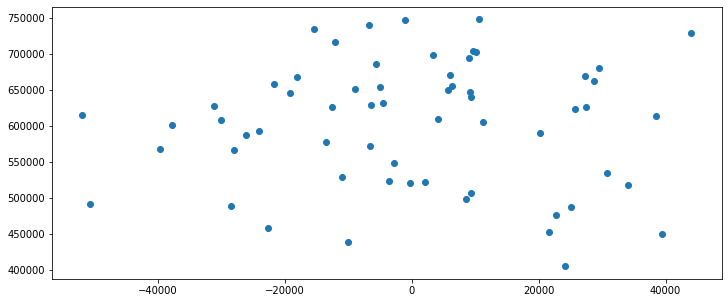

In [15]:
pred_val = alameda_f_m.fittedvalues.copy()
true_val = alameda_df.SalePrice.values.copy()
residual = true_val - pred_val

fig, ax = plt.subplots(figsize=(12,5))
_ = ax.scatter(residual, pred_val)


#### 4.1.2. Quantile plot of the residuals.  

There seems to be few outliers in the lowest and highest range while there is 2 distinct groups. You can see the break at thoeretical quantiles 0.75. 
YMJ Question - what does this mean??? 

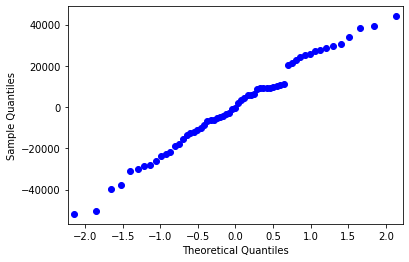

In [16]:
res = alameda_f_m.resid # residuals
fig = sm.qqplot(res)
plt.show()

#### 4.1.3. Leverage Plot

Outliers - 0, 2, 1,48, 69,3,23 - Check what these data are. Drop them and try again. 

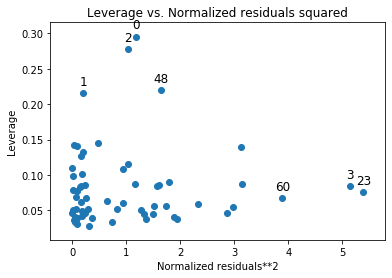

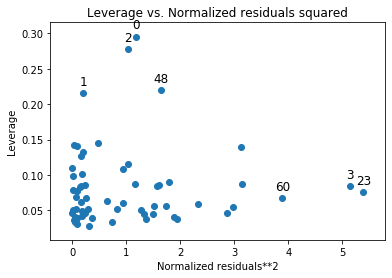

In [17]:
# leverage plot

from statsmodels.graphics.regressionplots import *
plot_leverage_resid2(alameda_f_m)

#### 4.1.4. Remove outliers and try again.

### 4.2. Sacramento

### 4.3 L.A.

## 5. Use KMeans clustering method to categorize different counties by their characteristics.